### Table of Contents:
Imports: Imported libraries  
Dataframes: Dataframe to be used  
1: PII Report  
2: Derived region column and crosstab of region and spending_status  
3: Derived low_activity column and subset  
4: Derived type column  
5: Barchart of type column  
6: Statistics for total_user_orders and prices columns  
7: Crosstabs and aggregation groupings  
8: Scatterplots of frequently shopped departments by user type  
9: Export dataframe

# Imports

In [1]:
import pandas
import numpy
import seaborn

# Dataframes

In [2]:
dataframe = pandas.read_pickle(r"C:\Users\justi\Downloads\Instacart Basket Analysis\2. Data\Prepared\orders_products_customers.pkl")

# 1

No PII present

# 2

In [ ]:
# Create list for new column region
lst = []
for value in dataframe['state']:
    if value in(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York',
                 'Pennsylvania', 'New Jersey']):
        lst.append('Northeast')
    elif value in(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
                   'Minnesota', 'Iowa', 'Missouri']):
        lst.append('Midwest')
    elif value in (['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
                    'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma',
                    'Texas', 'Arkansas', 'Louisiana']):
        lst.append('South')
    elif value in (['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska',
                    'Washington', 'Oregon', 'California', 'Hawaii']):
        lst.append('West')

In [ ]:
dataframe['region'] = lst

In [4]:
# Create crosstab of spending by region
crosstab = pandas.crosstab(dataframe['spending_status'], dataframe['region'], dropna = False)

In [5]:
crosstab

region,Midwest,Northeast,South,West
spending_status,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


In [6]:
# Print high to low spending ratios by region
print('Midwest:', 155975 / 7441350)
print('Northeast:', 108225 / 5614511)
print('South:', 209691 / 10582194)
print('West:', 160354 / 8132559)


Midwest: 0.020960578389673915
Northeast: 0.01927594406707904
South: 0.019815456038700482
West: 0.019717532943812642


There is not a significant difference in spending habits by region

# 3

In [ ]:
# Create new column low_activity
dataframe.loc[dataframe['total_user_orders'] < 5, 'low_activity'] = True

In [ ]:
dataframe.loc[dataframe['total_user_orders'] >= 5, 'low_activity'] = False

In [ ]:
# Create subset of users with 5 or more orders
subset = dataframe.loc[dataframe['low_activity'] == False]

In [ ]:
# Export subset
subset.to_pickle(r"C:\Users\justi\Downloads\Instacart Basket Analysis\2. Data\Prepared\orders_products_all.pkl")

# 4

In [ ]:
# Create new type column
dataframe.loc[(dataframe['age'] < 31) & (dataframe['marital_status'] == 'married'), 'type'] = 'Married young adult'

In [ ]:
dataframe.loc[(dataframe['age'] >= 31) & (dataframe['age'] < 65) & (dataframe['marital_status'] == 'married'), 'type'] = 'Married adult'

In [ ]:
dataframe.loc[(dataframe['age'] >= 65) & (dataframe['marital_status'] == 'married'), 'type'] = 'Married senior'

In [ ]:
dataframe.loc[(dataframe['age'] < 31) & (dataframe['marital_status'] == 'single'), 'type'] = 'Unmarried young adult'
dataframe.loc[(dataframe['age'] < 31) & (dataframe['marital_status'] == 'divorced/widowed'), 'type'] = 'Unmarried young adult'
dataframe.loc[(dataframe['age'] < 31) & (dataframe['marital_status'] == 'living with parents and siblings'), 'type'] = 'Unmarried young adult'

In [ ]:
dataframe.loc[(dataframe['age'] >= 31) & (dataframe['age'] < 65) & (dataframe['marital_status'] == 'single'), 'type'] = 'Unmarried adult'
dataframe.loc[(dataframe['age'] >= 31) & (dataframe['age'] < 65) & (dataframe['marital_status'] == 'divorced/widowed'), 'type'] = 'Unmarried adult'
dataframe.loc[(dataframe['age'] >= 31) & (dataframe['age'] < 65) & (dataframe['marital_status'] == 'living with parents and siblings'), 'type'] = 'Unmarried adult'

In [ ]:
dataframe.loc[(dataframe['age'] >= 65) & (dataframe['marital_status'] == 'single'), 'type'] = 'Unmarried senior'
dataframe.loc[(dataframe['age'] >= 65) & (dataframe['marital_status'] == 'divorced/widowed'), 'type'] = 'Unmarried senior'
dataframe.loc[(dataframe['age'] >= 65) & (dataframe['marital_status'] == 'living with parents and siblings'), 'type'] = 'Unmarried senior'

# 5

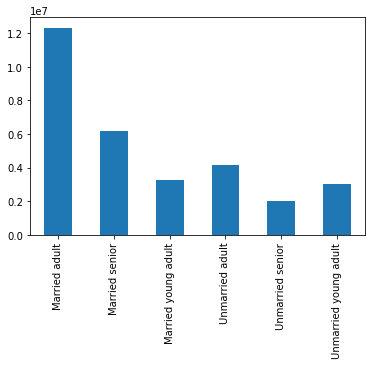

In [8]:
# Create barchart of type column
barchart = subset['type'].value_counts().sort_index().plot.bar()

# 6

In [9]:
# Order statistics by type variable
subset.groupby('type').agg({'total_user_orders':['mean', 'min', 'max']})

total_user_orders        
                                   mean min max
type                                           
Married adult                 34.380536   5  99
Married senior                34.288679   5  99
Married young adult           34.066577   5  99
Unmarried adult               35.056090   5  99
Unmarried senior              34.442822   5  99
Unmarried young adult         34.400108   5  99

In [10]:
# Product price statistics by type variable
subset.groupby('type').agg({'prices':['mean', 'min', 'max']})

prices           
                           mean  min   max
type                                      
Married adult          7.791425  1.0  25.0
Married senior         7.794990  1.0  25.0
Married young adult    7.776981  1.0  25.0
Unmarried adult        7.789980  1.0  25.0
Unmarried senior       7.801982  1.0  25.0
Unmarried young adult  7.786098  1.0  25.0

# 7

In [11]:
# Create crosstab showing type and region
region_table = pandas.crosstab(subset['type'], subset['region'], dropna = False)

In [12]:
region_table

region,Midwest,Northeast,South,West
type,,,,
Married adult,2898526,2177686,4093845,3150372
Married senior,1433965,1105968,2050724,1582929
Married young adult,754771,570119,1079180,845626
Unmarried adult,997894,690716,1381931,1073810
Unmarried senior,470081,378839,657737,515301
Unmarried young adult,706276,541357,1047722,759189


In [13]:
# Create crosstab showing type and department
department_table = pandas.crosstab(subset['type'], subset['department_id'], dropna = False)

In [14]:
department_table

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
type,,,,,,,,,,,,,,,,,,,,,
Married adult,843073,13278,445099,3611116,56856,101671,1022780,36347,327247,13318,170390,268815,710824,267764,401838,2058552,280565,164988,1102471,397734,25703
Married senior,423146,6791,223579,1813012,27554,50686,515378,18349,164020,6851,82961,136819,356648,132810,202766,1029272,141616,80312,548253,199831,12932
Married young adult,223171,3813,117071,949165,15011,26779,269295,9424,87031,3649,44549,70925,185484,70646,107973,544775,72969,42383,293934,104768,6881
Unmarried adult,283087,4777,152137,1216828,20643,34398,345860,12003,108465,4228,56186,87918,237637,90155,134483,694282,90846,55130,369669,137148,8471
Unmarried senior,141104,2155,72418,595092,9139,16513,168642,6766,53296,2094,28091,44331,115735,42486,64743,338800,45014,25892,180296,65368,3983
Unmarried young adult,208150,3597,110524,894060,15424,25944,249946,10171,82077,3311,42129,65973,176377,66989,100271,511501,68847,41687,271783,98985,6798


In [15]:
# Export department table
department_table.to_csv(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Tables\department_table.csv")

In [19]:
# Create table showing order hour and age
age_table = subset.groupby('order_hour_of_day').agg({'age':'mean'})

In [ ]:
# Export age table
age_table.to_csv(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Tables\age_table.csv")

In [20]:
# Create table showing order hour and income
income_table = subset.groupby('order_hour_of_day').agg({'annual_income':'mean'})

In [22]:
# Export income table
income_table.to_csv(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Tables\income_table.csv")

# 8

In [6]:
# Create dataframe from department_table
department_table_df = pandas.read_csv(r"C:\Users\justi\Downloads\Instacart Basket Analysis\2. Data\Prepared\department_table.csv")

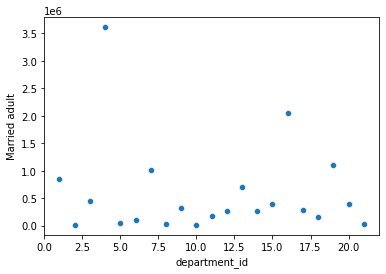

In [17]:
# Create scatterplots from department_table dataframe
scatter = seaborn.scatterplot(x = 'department_id', y = 'Married adult', data = department_table_df)

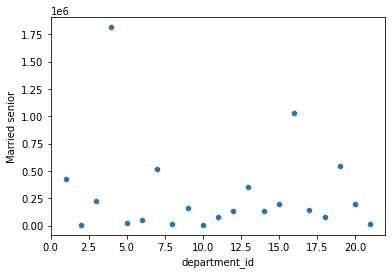

In [7]:
scatter2 = seaborn.scatterplot(x = 'department_id', y = 'Married senior', data = department_table_df)

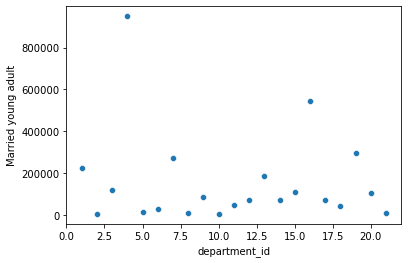

In [9]:
scatter3 = seaborn.scatterplot(x = 'department_id', y = 'Married young adult', data = department_table_df)

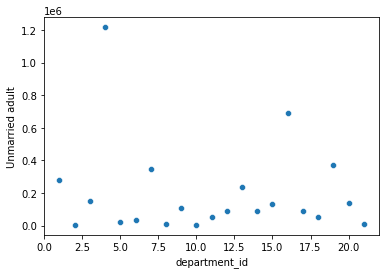

In [10]:
scatter4 = seaborn.scatterplot(x = 'department_id', y = 'Unmarried adult', data = department_table_df)

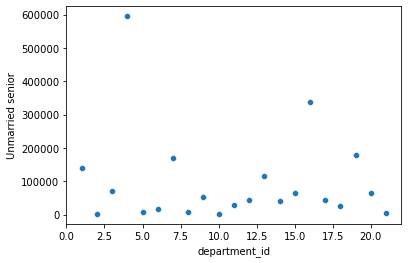

In [11]:
scatter5 = seaborn.scatterplot(x = 'department_id', y = 'Unmarried senior', data = department_table_df)

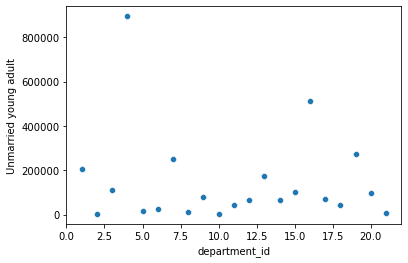

In [12]:
scatter6 = seaborn.scatterplot(x = 'department_id', y = 'Unmarried young adult', data = department_table_df)

In [18]:
# Export scatterplots
scatter.figure.savefig(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Visualizations\scatterplot.png")

In [8]:

scatter2.figure.savefig(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Visualizations\scatterplot2.png")

In [13]:
scatter3.figure.savefig(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Visualizations\scatterplot3.png")

In [14]:
scatter4.figure.savefig(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Visualizations\scatterplot4.png")

In [15]:
scatter5.figure.savefig(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Visualizations\scatterplot5.png")

In [16]:
scatter6.figure.savefig(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Visualizations\scatterplot6.png")

In [19]:
# Export barchart from step 6
barchart.figure.savefig(r"C:\Users\justi\Downloads\Instacart Basket Analysis\4. Analysis\Visualizations\barchart3.png")

# 9

In [ ]:
# Overwrite dataframe
dataframe.to_pickle(r"C:\Users\justi\Downloads\Instacart Basket Analysis\2. Data\Prepared\orders_products_customers.pkl")